<a href="https://colab.research.google.com/github/avushek2305/Smai-Assignment-3/blob/main/Knowing_MLPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMAI Assignment - 3

## Question - `3` : Knowing MLPs

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

## Please read the following before moving on

Welcome to the world of Multilayer Perceptrons (MLP)! You already know that MLPs are feedforward neural networks consisting of multiple layers of nodes or neurons. These networks are well-suited for a wide range of classification and regression tasks, thanks to their ability to learn complex, non-linear relationships between inputs and outputs.

In this assignment, we will be working with the MNIST dataset to explore the importance of different MLP components. The MNIST dataset consists of 70,000 handwritten digit images, each of which is 28x28 pixels in size. Our goal is to use an MLP to classify these images into one of 10 categories (0-9).

To improve the performance of our MLP, we will experiment with various techniques such as Dropout, Batch Normalization, Loss Functions, Stochastic batch and mini-batch gradient descent, and more. Please note, you must use mini-batch unless explicity specified.

In addition, we will experiment with different optimization algorithms such as stochastic gradient descent, Adam, and RMSprop to find the optimal weights and biases for our MLP. We will use stochastic batch and mini-batch gradient descent, which involve updating the weights and biases of the network based on a small batch of randomly sampled training examples, to speed up the training process and reduce memory usage.

By the end of this assignment, you will have gained a deeper understanding of the various components that make up an MLP and their importance in achieving high performance in classification tasks. You will have gained hands-on experience in experimenting with these components and learned how to fine-tune an MLP to achieve the best possible performance on the MNIST dataset. So, let's get started!

🫵Pro-tip: Do not re-write any results so as to re-use them in later experiments for tabulation and plotting.

💭Trivia: Did you know code written using ChatGPT is easy to catch?

### Step zero: Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
%matplotlib inline

import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.nn as nn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


### Step one: Using a PyTorch Dataset
Load MNIST dataset from `torchvision.datasets`

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(), # Convert PIL image to pytorch tensor
    transforms.Normalize((0.1307,), (0.3081,)) # Normalize tensor with mean and standard deviation
])

trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


In [3]:
trainloader_minibatch = torch.utils.data.DataLoader(trainset, batch_size=32
                                                    , shuffle=True, num_workers=2)
trainloader_stochastic = torch.utils.data.DataLoader(trainset, batch_size=1
                                                     , shuffle=True, num_workers=2)
testloader_minibatch = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

testloader_stochastic = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=2)

In [4]:
from tqdm import tqdm

# pbar = tqdm(total=len(trainloader_minibatch))
# for idx, (data,label) in enumerate(trainloader_minibatch):
#     print(idx,data.size(),label.size())
#     pbar.update(1)
#     break
# pbar.refresh()

### Step two: Define a MLP Model and without any bells and whitsles...
... along with a CrossEntropy loss criterion 

Do not use Dropout, BN or any other thing. Use ReLU for hidden layers.

⚠️ Do not use SoftMax in the output as nn.CrossEntropyLoss combines SoftMax and NLLLoss.

In [5]:
def get_Accuracy_F1Score_Precision_Recall(trainloader,model):
  preds = []
  truth = []
  # model.train()
  with torch.no_grad():
      for data in trainloader:
          inputs, labels = data
          outputs = model(inputs)
          _, predicted = torch.max(outputs.data, 1)
          preds.extend(predicted.numpy())
          truth.extend(labels.numpy())

  acc = accuracy_score(truth, preds)
  f1 = f1_score(truth, preds, average='weighted')
  precision = precision_score(truth, preds, average='weighted')
  recall = recall_score(truth, preds, average='weighted')

  return acc,f1,precision,recall


In [6]:
def get_test_loss(model,loss_function,testloader_minibatch):
  curr_loss = 0.0
  with torch.no_grad():
      for data in testloader_minibatch:
          inputs, labels = data
          outputs = model(inputs)
          loss = loss_function(outputs, labels)
          curr_loss += loss.item()
      return curr_loss

In [7]:
class SimpleMLP(nn.Module):
  def __init__(self):
      super().__init__()
      self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28 , 256),
        nn.ReLU(),
        nn.Linear(256, 10)
      )

   

  def forward(self, x):
    return self.layers(x)
  

In [8]:
# train_acc, train_f1,train_precision,train_recall = get_Accuracy_F1Score_Precision_Recall(trainloader_minibatch,model)
# test_acc, test_f1,test_precision,test_recall = get_Accuracy_F1Score_Precision_Recall(testloader_minibatch,model)

In [9]:
# Print metrics in a tabular form
# print("Results:")
# print("========")
# print(f"{'':<10s}{'Accuracy':<10s}{'F1 Score':<10s}{'Precision':<10s}{'Recall':<10s}")
# print(f"{'Train':<10s}{train_acc:<10.4f}{train_f1:<10.4f}{train_precision:<10.4f}{train_recall:<10.4f}")
# print(f"{'Test':<10s}{test_acc:<10.4f}{test_f1:<10.4f}{test_precision:<10.4f}{test_recall:<10.4f}")


### Step three: Define the following optimizers using nn.optim
1. SGD
2. SGD with momentum
3. SGD with L2 regularization
4. RMSprop
5. Adam

In [10]:
# SGD 
# Initialize the MLP using SGD
model_SGD = SimpleMLP()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer_SGD = torch.optim.SGD(model_SGD.parameters(), lr=0.001)

In [11]:
# SGD with  momentum
# Initialize the MLP using momentum
model_momentum = SimpleMLP()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer_momentum = torch.optim.SGD(model_momentum.parameters(), lr=0.0001, momentum=0.9)

In [12]:
# SGD with L2 regularization
# Initialize the MLP using RMSprop
model_L2 = SimpleMLP()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer_L2 = torch.optim.SGD(model_L2.parameters(), lr=0.001, weight_decay=0.001)

In [13]:
# RMSprop
# Initialize the MLP using RMSprop
model_RMSprop = SimpleMLP()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer_RMSprop = torch.optim.RMSprop(model_RMSprop.parameters(), lr=0.0001, alpha=0.9)

In [14]:
# Initialize the MLP using Adam
model_adam = SimpleMLP()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer_adam = torch.optim.Adam(model_adam.parameters(), lr=0.0001)

### Step four: Run the SimpleMLP using different optimizers and plot train and test loss for each optimizer.
Explain the results.

Report final accuracy, F1 score and other relavant metrics in a tabular form on test and train datasets.

In [15]:
pbar = tqdm(total=5)
loss_SGD_train = []
loss_SGD_test = []
for epoch in range(0, 5): # 5 epochs at maximum
  
  # Print epoch
  print(f'Starting epoch {epoch+1}')
  
  # Set current loss value
  current_loss = 0.0
  
  # Iterate over the DataLoader for training data
  c = 0
  for i, data in enumerate(trainloader_minibatch, 0):
  
    # print(i)
    # Get inputs
    inputs, targets = data
    
    # Zero the gradients
    optimizer_SGD.zero_grad()
    
    # Perform forward pass
    outputs = model_SGD(inputs)
    
    # Compute loss
    loss = loss_function(outputs, targets)
    
    # Perform backward pass
    loss.backward()
    
    # Perform optimization
    optimizer_SGD.step()
    
    # Print statistics
    current_loss += loss.item()
    if(i == 937):
      print('Loss after mini-batch %5d: %.3f' %
          ( i , current_loss / i))
      
  loss_SGD_train.append(current_loss/len(trainloader_minibatch))
  curr_loss = get_test_loss(model_SGD,loss_function,testloader_minibatch)
  loss_SGD_test.append(curr_loss/len(testloader_minibatch))
  pbar.update(1)
    

# Process is complete.
print('Training process has finished.')

  0%|          | 0/5 [00:00<?, ?it/s]

Starting epoch 1
Loss after mini-batch   937: 1.627


 20%|██        | 1/5 [00:53<03:34, 53.59s/it]

Starting epoch 2
Loss after mini-batch   937: 0.560


 40%|████      | 2/5 [01:23<01:59, 39.83s/it]

Starting epoch 3
Loss after mini-batch   937: 0.427


 60%|██████    | 3/5 [01:50<01:08, 34.01s/it]

Starting epoch 4
Loss after mini-batch   937: 0.370


 80%|████████  | 4/5 [02:18<00:31, 31.32s/it]

Starting epoch 5
Loss after mini-batch   937: 0.340


100%|██████████| 5/5 [02:45<00:00, 29.92s/it]

Training process has finished.


In [16]:
train_acc_sgd, train_f1_sgd,train_precision_sgd,train_recall_sgd = get_Accuracy_F1Score_Precision_Recall(trainloader_minibatch,model_SGD)
test_acc_sgd, test_f1_sgd,test_precision_sgd,test_recall_sgd = get_Accuracy_F1Score_Precision_Recall(testloader_minibatch,model_SGD)
# Print metrics in a tabular form
print("Results:")
print("========")
print(f"{'':<10s}{'Accuracy':<10s}{'F1 Score':<10s}{'Precision':<10s}{'Recall':<10s}")
print(f"{'Train':<10s}{train_acc_sgd:<10.4f}{train_f1_sgd:<10.4f}{train_precision_sgd:<10.4f}{train_recall_sgd:<10.4f}")
print(f"{'Test':<10s}{test_acc_sgd:<10.4f}{test_f1_sgd:<10.4f}{test_precision_sgd:<10.4f}{test_recall_sgd:<10.4f}")

Results:
          Accuracy  F1 Score  Precision Recall    
Train     0.9074    0.9071    0.9071    0.9074    
Test      0.9121    0.9117    0.9121    0.9121    


In [17]:
pbar = tqdm(total=5)
loss_momentum_train = []
loss_momentum_test = []
for epoch in range(0, 5): # 5 epochs at maximum
  
  # Print epoch
  print(f'Starting epoch {epoch+1}')
  
  # Set current loss value
  current_loss = 0.0
  
  # Iterate over the DataLoader for training data
  c = 0
  for i, data in enumerate(trainloader_minibatch, 0):
  
    # print(i)
    # Get inputs
    inputs, targets = data
    
    # Zero the gradients
    optimizer_momentum.zero_grad()
    
    # Perform forward pass
    outputs = model_momentum(inputs)
    
    # Compute loss
    loss = loss_function(outputs, targets)
    
    # Perform backward pass
    loss.backward()
    
    # Perform optimization
    optimizer_momentum.step()
    
    # Print statistics
    current_loss += loss.item()
    if(i == 937):
      print('Loss after mini-batch %5d: %.3f' %
          ( i , current_loss / i))
      
  loss_momentum_train.append(current_loss/len(trainloader_minibatch))
  curr_loss = get_test_loss(model_momentum,loss_function,testloader_minibatch)
  loss_momentum_test.append(curr_loss/len(testloader_minibatch))
  pbar.update(1)
    
    

# Process is complete.
print('Training process has finished.')


  0%|          | 0/5 [00:00<?, ?it/s]

Starting epoch 1


100%|██████████| 5/5 [03:11<00:00, 38.35s/it]


Loss after mini-batch   937: 1.589



 20%|██        | 1/5 [00:27<01:49, 27.45s/it]

Starting epoch 2
Loss after mini-batch   937: 0.572



 40%|████      | 2/5 [00:56<01:25, 28.48s/it]

Starting epoch 3
Loss after mini-batch   937: 0.427



 60%|██████    | 3/5 [01:24<00:56, 28.17s/it]

Starting epoch 4
Loss after mini-batch   937: 0.376



 80%|████████  | 4/5 [01:52<00:27, 27.97s/it]

Starting epoch 5
Loss after mini-batch   937: 0.345



100%|██████████| 5/5 [02:19<00:00, 27.93s/it]

Training process has finished.


In [18]:
train_acc_momentum, train_f1_momentum,train_precision_momentum,train_recall_momentum = get_Accuracy_F1Score_Precision_Recall(trainloader_minibatch,model_momentum)
test_acc_momentum, test_f1_momentum,test_precision_momentum,test_recall_momentum = get_Accuracy_F1Score_Precision_Recall(testloader_minibatch,model_momentum)
# Print metrics in a tabular form
print("Results:")
print("========")
print(f"{'':<10s}{'Accuracy':<10s}{'F1 Score':<10s}{'Precision':<10s}{'Recall':<10s}")
print(f"{'Train':<10s}{train_acc_momentum:<10.4f}{train_f1_momentum:<10.4f}{train_precision_momentum:<10.4f}{train_recall_momentum:<10.4f}")
print(f"{'Test':<10s}{test_acc_momentum:<10.4f}{test_f1_momentum:<10.4f}{test_precision_momentum:<10.4f}{test_recall_momentum:<10.4f}")

Results:
          Accuracy  F1 Score  Precision Recall    
Train     0.9085    0.9082    0.9082    0.9085    
Test      0.9131    0.9129    0.9132    0.9131    


In [19]:
pbar = tqdm(total=5)
loss_L2_train = []
loss_L2_test = []
for epoch in range(0, 5): # 5 epochs at maximum
  
  # Print epoch
  print(f'Starting epoch {epoch+1}')
  
  # Set current loss value
  current_loss = 0.0
  
  # Iterate over the DataLoader for training data
  c = 0
  for i, data in enumerate(trainloader_minibatch, 0):
  
    # print(i)
    # Get inputs
    inputs, targets = data
    
    # Zero the gradients
    optimizer_L2.zero_grad()
    
    # Perform forward pass
    outputs = model_L2(inputs)
    
    # Compute loss
    loss = loss_function(outputs, targets)
    
    # Perform backward pass
    loss.backward()
    
    # Perform optimization
    optimizer_L2.step()
    
    # Print statistics
    current_loss += loss.item()
    if(i == 937):
      print('Loss after mini-batch %5d: %.3f' %
          ( i , current_loss / i))
      
  loss_L2_train.append(current_loss/len(trainloader_minibatch))
  curr_loss = get_test_loss(model_L2,loss_function,testloader_minibatch)
  loss_L2_test.append(curr_loss/len(testloader_minibatch))
  pbar.update(1)
        
    

# Process is complete.
print('Training process has finished.')

  0%|          | 0/5 [00:00<?, ?it/s]

Starting epoch 1


100%|██████████| 5/5 [02:45<00:00, 33.07s/it]


Loss after mini-batch   937: 1.593


 20%|██        | 1/5 [00:31<02:05, 31.30s/it]

Starting epoch 2
Loss after mini-batch   937: 0.567


 40%|████      | 2/5 [00:59<01:27, 29.31s/it]

Starting epoch 3
Loss after mini-batch   937: 0.423


 60%|██████    | 3/5 [01:29<00:59, 29.98s/it]

Starting epoch 4
Loss after mini-batch   937: 0.372


 80%|████████  | 4/5 [01:57<00:28, 28.97s/it]

Starting epoch 5
Loss after mini-batch   937: 0.345


100%|██████████| 5/5 [02:25<00:00, 28.51s/it]

Training process has finished.


In [20]:
train_acc_l2, train_f1_l2,train_precision_l2,train_recall_l2 = get_Accuracy_F1Score_Precision_Recall(trainloader_minibatch,model_L2)
test_acc_l2, test_f1_l2,test_precision_l2,test_recall_l2 = get_Accuracy_F1Score_Precision_Recall(testloader_minibatch,model_L2)
# Print metrics in a tabular form
print("Results:")
print("========")
print(f"{'':<10s}{'Accuracy':<10s}{'F1 Score':<10s}{'Precision':<10s}{'Recall':<10s}")
print(f"{'Train':<10s}{train_acc_l2:<10.4f}{train_f1_l2:<10.4f}{train_precision_l2:<10.4f}{train_recall_l2:<10.4f}")
print(f"{'Test':<10s}{test_acc_l2:<10.4f}{test_f1_l2:<10.4f}{test_precision_l2:<10.4f}{test_recall_l2:<10.4f}")

Results:
          Accuracy  F1 Score  Precision Recall    
Train     0.9072    0.9069    0.9070    0.9072    
Test      0.9110    0.9107    0.9108    0.9110    


In [21]:
# Run the training loop for RMSprop
pbar = tqdm(total=5)
loss_RMSprop_train = []
loss_RMSprop_test = []
for epoch in range(0, 5): # 5 epochs at maximum
  
  # Print epoch
  print(f'Starting epoch {epoch+1}')
  
  # Set current loss value
  current_loss = 0.0
  
  # Iterate over the DataLoader for training data
  c = 0
  for i, data in enumerate(trainloader_minibatch, 0):
  
    # print(i)
    # Get inputs
    inputs, targets = data
    
    # Zero the gradients
    optimizer_RMSprop.zero_grad()
    
    # Perform forward pass
    outputs = model_RMSprop(inputs)
    
    # Compute loss
    loss = loss_function(outputs, targets)
    
    # Perform backward pass
    loss.backward()
    
    # Perform optimization
    optimizer_RMSprop.step()
    
    # Print statistics
    current_loss += loss.item()
    if(i == 937):
      print('Loss after mini-batch %5d: %.3f' %
          ( i , current_loss / i))
      
  loss_RMSprop_train.append(current_loss/len(trainloader_minibatch))
  curr_loss = get_test_loss(model_RMSprop,loss_function,testloader_minibatch)
  loss_RMSprop_test.append(curr_loss/len(testloader_minibatch))
  pbar.update(1)
    


# Process is complete.
print('Training process has finished.')


  0%|          | 0/5 [00:00<?, ?it/s]

Starting epoch 1


100%|██████████| 5/5 [02:50<00:00, 34.08s/it]


Loss after mini-batch   937: 0.543



 20%|██        | 1/5 [00:28<01:52, 28.10s/it]

Starting epoch 2
Loss after mini-batch   937: 0.222



 40%|████      | 2/5 [00:56<01:24, 28.15s/it]

Starting epoch 3
Loss after mini-batch   937: 0.166



 60%|██████    | 3/5 [01:24<00:56, 28.32s/it]

Starting epoch 4
Loss after mini-batch   937: 0.130



 80%|████████  | 4/5 [01:54<00:28, 28.79s/it]

Starting epoch 5
Loss after mini-batch   937: 0.109



100%|██████████| 5/5 [02:22<00:00, 28.59s/it]

Training process has finished.


In [22]:
train_accRMSprop, train_f1RMSprop,train_precisionRMSprop,train_recallRMSprop = get_Accuracy_F1Score_Precision_Recall(trainloader_minibatch,model_RMSprop)
test_accRMSprop, test_f1RMSprop,test_precisionRMSprop,test_recallRMSprop = get_Accuracy_F1Score_Precision_Recall(testloader_minibatch,model_RMSprop)
# Print metrics in a tabular form
print("Results:")
print("========")
print(f"{'':<10s}{'Accuracy':<10s}{'F1 Score':<10s}{'Precision':<10s}{'Recall':<10s}")
print(f"{'Train':<10s}{train_accRMSprop:<10.4f}{train_f1RMSprop:<10.4f}{train_precisionRMSprop:<10.4f}{train_recallRMSprop:<10.4f}")
print(f"{'Test':<10s}{test_accRMSprop:<10.4f}{test_f1RMSprop:<10.4f}{test_precisionRMSprop:<10.4f}{test_recallRMSprop:<10.4f}")

Results:
          Accuracy  F1 Score  Precision Recall    
Train     0.9749    0.9749    0.9750    0.9749    
Test      0.9689    0.9689    0.9689    0.9689    


In [23]:
# Run the training loop for adam
pbar = tqdm(total=5)
loss_adam_train = []
loss_adam_test = []
for epoch in range(0, 5): # 5 epochs at maximum
  
  # Print epoch
  print(f'Starting epoch {epoch+1}')
  
  # Set current loss value
  current_loss = 0.0
  
  # Iterate over the DataLoader for training data
  c = 0
  for i, data in enumerate(trainloader_minibatch, 0):
  
    # print(i)
    # Get inputs
    inputs, targets = data
    
    # Zero the gradients
    optimizer_adam.zero_grad()
    
    # Perform forward pass
    outputs = model_adam(inputs)
    
    # Compute loss
    loss = loss_function(outputs, targets)
    
    # Perform backward pass
    loss.backward()
    
    # Perform optimization
    optimizer_adam.step()
    
    # Print statistics
    current_loss += loss.item()
    if(i == 937):
      print('Loss after mini-batch %5d: %.3f' %
          ( i , current_loss / i))
      
  loss_adam_train.append(current_loss/len(trainloader_minibatch))
  curr_loss = get_test_loss(model_adam,loss_function,testloader_minibatch)
  loss_adam_test.append(curr_loss/len(testloader_minibatch))
  pbar.update(1)
    
    

# Process is complete.
print('Training process has finished.')


  0%|          | 0/5 [00:00<?, ?it/s]

Starting epoch 1


100%|██████████| 5/5 [02:47<00:00, 33.56s/it]


Loss after mini-batch   937: 0.558


 20%|██        | 1/5 [00:29<01:58, 29.69s/it]

Starting epoch 2
Loss after mini-batch   937: 0.222


 40%|████      | 2/5 [00:58<01:27, 29.17s/it]

Starting epoch 3
Loss after mini-batch   937: 0.156


 60%|██████    | 3/5 [01:28<00:59, 29.53s/it]

Starting epoch 4
Loss after mini-batch   937: 0.124


 80%|████████  | 4/5 [01:58<00:29, 29.58s/it]

Starting epoch 5
Loss after mini-batch   937: 0.099


100%|██████████| 5/5 [02:27<00:00, 29.47s/it]

Training process has finished.


In [24]:
train_acc_adam, train_f1_adam,train_precision_adam,train_recall_adam = get_Accuracy_F1Score_Precision_Recall(trainloader_minibatch,model_adam)
test_acc_adam, test_f1_adam,test_precision_adam,test_recall_adam = get_Accuracy_F1Score_Precision_Recall(testloader_minibatch,model_adam)
# Print metrics in a tabular form
print("Results:")
print("========")
print(f"{'':<10s}{'Accuracy':<10s}{'F1 Score':<10s}{'Precision':<10s}{'Recall':<10s}")
print(f"{'Train':<10s}{train_acc_adam:<10.4f}{train_f1_adam:<10.4f}{train_precision_adam:<10.4f}{train_recall_adam:<10.4f}")
print(f"{'Test':<10s}{test_acc_adam:<10.4f}{test_f1_adam:<10.4f}{test_precision_adam:<10.4f}{test_recall_adam:<10.4f}")

Results:
          Accuracy  F1 Score  Precision Recall    
Train     0.9775    0.9775    0.9776    0.9775    
Test      0.9717    0.9717    0.9717    0.9717    


In [47]:
losses[0][0]

[781.6802521236241,
 384.4153128378093,
 283.47950138151646,
 223.5374536179006,
 182.95085431821644]

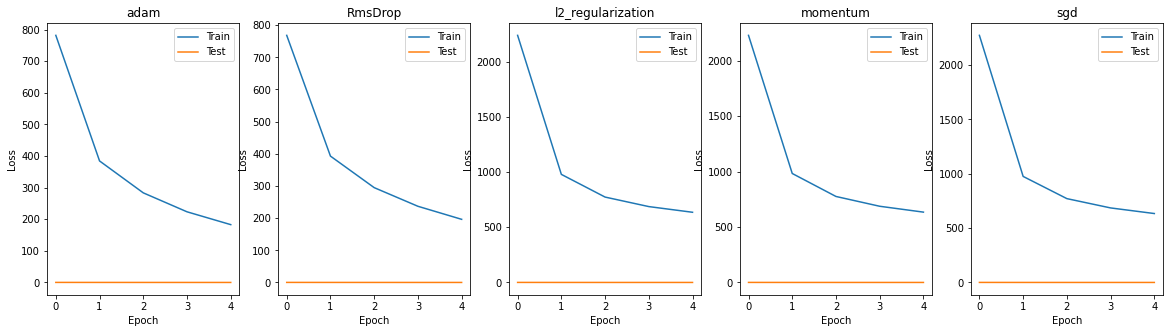

In [25]:

losses = [[loss_adam_train,loss_adam_test],[loss_RMSprop_train,loss_RMSprop_test],[loss_L2_train,loss_L2_test],[loss_momentum_train,loss_momentum_test],[loss_SGD_train,loss_SGD_test]]
import matplotlib.pyplot as plt
# Plot the train and test loss for each optimizer
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
optimizer_name = ['adam','RmsDrop','l2_regularization','momentum','sgd']
for i in range(5):
    axs[i].plot(losses[i][0], label='Train')
    axs[i].plot(losses[i][1], label='Test')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Loss')
    axs[i].set_title(optimizer_name[i])
    axs[i].legend()

plt.show()

### Step five: Using SimpleMLP and Adam optimizer, train models using 2 different lr_schedulers.
Select 2 of **MultiplicativeLR**, **MultiStepLR**, **LinearLR** and **ExponentialLR**

Compare the results among different LR schedulers and the original model which didn't employ any LR scheduler. Compile results in a tabular form. Plot losses for each. Explain results.

In [26]:
import torch.optim as optim
from torch.optim.lr_scheduler import MultiplicativeLR, MultiStepLR, ExponentialLR, LambdaLR

In [27]:
model_MultiStepLR = SimpleMLP()
loss_function = nn.CrossEntropyLoss()

# Define the optimizer and the learning rate scheduler
optimiz_MultiStepLR = optim.Adam(model_MultiStepLR.parameters(),lr=0.0001)
lr_scheduler1 = optim.lr_scheduler.MultiStepLR(optimiz_MultiStepLR, milestones=[5, 10], gamma=0.1)
losses_MultiStepLR = []

In [28]:
model_ExponentialLR = SimpleMLP()
loss_function = nn.CrossEntropyLoss()

# Define the optimizer and the learning rate scheduler
optimiz_ExponentialLR = optim.Adam(model_ExponentialLR.parameters(), lr=0.0001)
lr_scheduler2 = optim.lr_scheduler.ExponentialLR(optimiz_ExponentialLR, gamma=0.9)
losses_ExponentialLR = []

In [29]:
for epoch in range(5):
    current_loss = 0.0
    for i, data in enumerate(trainloader_minibatch, 0):
      
        # print(i)
        # Get inputs
        inputs, targets = data
        
        # Zero the gradients
        optimiz_MultiStepLR.zero_grad()
        
        # Perform forward pass
        outputs = model_MultiStepLR(inputs)
        
        # Compute loss
        loss = loss_function(outputs, targets)
        
        # Perform backward pass
        loss.backward()
        
        # Perform optimization
        optimiz_MultiStepLR.step()
        
        # Print statistics
        current_loss += loss.item()
    lr_scheduler1.step()
    losses_MultiStepLR.append(current_loss / len(trainloader_minibatch))

In [30]:
train_acc_MultiStepLR, train_f1_MultiStepLR,train_precision_MultiStepLR,train_recall_MultiStepLR = get_Accuracy_F1Score_Precision_Recall(trainloader_minibatch,model_MultiStepLR)
test_acc_MultiStepLR, test_f1_MultiStepLR,test_precision_MultiStepLR,test_recall_MultiStepLR = get_Accuracy_F1Score_Precision_Recall(testloader_minibatch,model_MultiStepLR)
print("Results:", 'MultiStepLR')
print("========")
print(f"{'':<10s}{'Accuracy':<10s}{'F1 Score':<10s}{'Precision':<10s}{'Recall':<10s}")
print(f"{'Train':<10s}{train_acc_MultiStepLR:<10.4f}{train_f1_MultiStepLR:<10.4f}{train_precision_MultiStepLR:<10.4f}{train_recall_MultiStepLR:<10.4f}")
print(f"{'Test':<10s}{test_acc_MultiStepLR:<10.4f}{test_f1_MultiStepLR:<10.4f}{test_precision_MultiStepLR:<10.4f}{test_recall_MultiStepLR:<10.4f}")

Results: MultiStepLR
          Accuracy  F1 Score  Precision Recall    
Train     0.9756    0.9756    0.9757    0.9756    
Test      0.9681    0.9681    0.9683    0.9681    


In [31]:
for epoch in range(5):
    current_loss = 0.0
    for i, data in enumerate(trainloader_minibatch, 0):
      
        # print(i)
        # Get inputs
        inputs, targets = data
        
        # Zero the gradients
        optimiz_ExponentialLR.zero_grad()
        
        # Perform forward pass
        outputs = model_ExponentialLR(inputs)
        
        # Compute loss
        loss = loss_function(outputs, targets)
        
        # Perform backward pass
        loss.backward()
        
        # Perform optimization
        optimiz_ExponentialLR.step()
        
        # Print statistics
        current_loss += loss.item()
    lr_scheduler2.step()
    losses_ExponentialLR.append(current_loss / len(trainloader_minibatch))

In [32]:
train_acc_Exp, train_f1_Exp,train_precision_Exp,train_recall_Exp = get_Accuracy_F1Score_Precision_Recall(trainloader_minibatch,model_ExponentialLR)
test_acc_Exp, test_f1_Exp,test_precision_Exp,test_recall_Exp = get_Accuracy_F1Score_Precision_Recall(testloader_minibatch,model_ExponentialLR)
print("Results:", 'MultiStepLR')
print("========")
print(f"{'':<10s}{'Accuracy':<10s}{'F1 Score':<10s}{'Precision':<10s}{'Recall':<10s}")
print(f"{'Train':<10s}{train_acc_Exp:<10.4f}{train_f1_Exp:<10.4f}{train_precision_Exp:<10.4f}{train_recall_Exp:<10.4f}")
print(f"{'Test':<10s}{test_acc_Exp:<10.4f}{test_f1_Exp:<10.4f}{test_precision_Exp:<10.4f}{test_recall_Exp:<10.4f}")

Results: MultiStepLR
          Accuracy  F1 Score  Precision Recall    
Train     0.9730    0.9730    0.9731    0.9730    
Test      0.9674    0.9674    0.9675    0.9674    


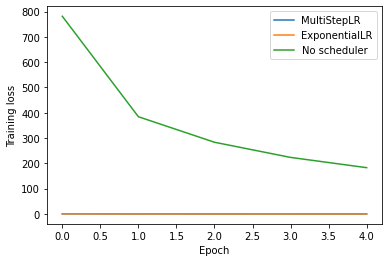

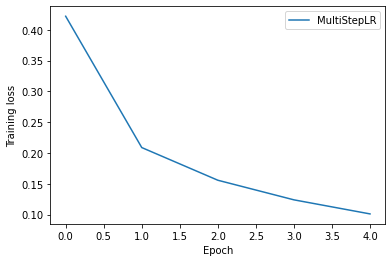

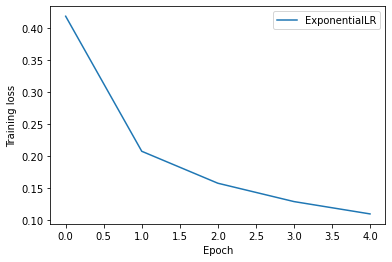

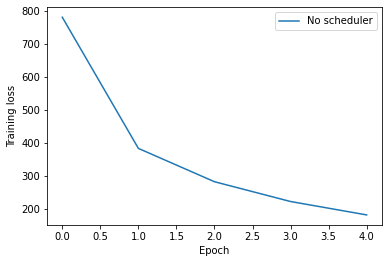

In [33]:
import matplotlib.pyplot as plt

plt.plot(losses_MultiStepLR, label='MultiStepLR')
plt.plot(losses_ExponentialLR, label='ExponentialLR')
plt.plot(loss_adam_train, label='No scheduler')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend()
plt.show()

plt.plot(losses_MultiStepLR, label='MultiStepLR')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend()
plt.show()

plt.plot(losses_ExponentialLR, label='ExponentialLR')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend()
plt.show()

plt.plot(loss_adam_train, label='No scheduler')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend()
plt.show()

### Step six: Define 3 models with following changes:
1. Add BatchNorm
2. Add Dropout
3. Add BatchNorm and Dropout

In [34]:
# code here

import torch.nn as nn

class MLPWithBatchNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.bn1 = nn.BatchNorm1d(128)
        self.bn2 = nn.BatchNorm1d(64)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.bn1(self.relu(self.layer1(x)))
        x = self.bn2(self.relu(self.layer2(x)))
        x = self.layer3(x)
        return x

In [35]:
class MLPWithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.dropout(self.relu(self.layer1(x)))
        x = self.dropout(self.relu(self.layer2(x)))
        x = self.layer3(x)
        return x


In [36]:
class MLPWithBatchNormAndDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(784, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.bn1 = nn.BatchNorm1d(128)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.dropout(self.bn1(self.relu(self.layer1(x))))
        x = self.dropout(self.bn2(self.relu(self.layer2(x))))
        x = self.layer3(x)
        return x



### Step seven: Train the above models and compare with SimpleMLP.

Use your choice of optimizer, use no lr_scheduler so as to re-use the previous results.

Perform analysis. You've got the drill by now.

In [37]:
# code here
# Initialize the MLP
# model = SimpleMLP()

# # Define the loss function and optimizer
# loss_function = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Initialize the MLPWithBatchNormAndDropout
model1 = MLPWithBatchNormAndDropout()

# Define the loss function and optimizer
loss_function1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=1e-3)

# Initialize the MLPWithDropout
model2 = MLPWithDropout()

# Define the loss function and optimizer
loss_function2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=1e-3)

# Initialize the MLPWithBatchNorm
model3 = MLPWithBatchNorm()

# Define the loss function and optimizer
loss_function3 = nn.CrossEntropyLoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=1e-3)

In [38]:
def train_model(model,loss_function,optimiz,trainloader,lr_scheduler2 = None):
  print(f"Training of model is started ...")
  losses = []
  per = tqdm(total = 5)
  for epoch in range(0, 5): # 5 epochs at maximum
  
  
      print(f'Starting epoch {epoch+1}')
      
      # Set current loss value
      current_loss = 0.0
      
      # Iterate over the DataLoader for training data
      
      for i, data in enumerate(trainloader, 0):
      
        inputs, targets = data
        
        # Zero the gradients
        optimiz.zero_grad()
        
        # Perform forward pass
        outputs = model(inputs)
        
        # Compute loss
        loss = loss_function(outputs, targets)
        
        # Perform backward pass
        loss.backward()
        
        # Perform optimization
        optimiz.step()
      
        
        # Print statistics
        current_loss += loss.item()
      if(lr_scheduler2):
        lr_scheduler2.step()
      print(f'loss at {epoch} :{current_loss/len(trainloader)}') 
      losses.append(current_loss/len(trainloader))
      per.update(1)
  return losses



In [39]:
# losses1 = train_model(model,loss_function,optimizer,trainloader_minibatch)
# train_acc, train_f1,train_precision,train_recall = get_Accuracy_F1Score_Precision_Recall(trainloader_minibatch,model)
# test_acc, test_f1,test_precision,test_recall = get_Accuracy_F1Score_Precision_Recall(testloader_minibatch,model)




In [40]:
# print("Results:", 'simpleMlp')
# print("========")
# print(f"{'':<10s}{'Accuracy':<10s}{'F1 Score':<10s}{'Precision':<10s}{'Recall':<10s}")
# print(f"{'Train':<10s}{train_acc:<10.4f}{train_f1:<10.4f}{train_precision:<10.4f}{train_recall:<10.4f}")
# print(f"{'Test':<10s}{test_acc:<10.4f}{test_f1:<10.4f}{test_precision:<10.4f}{test_recall:<10.4f}")

In [41]:
losses2 = train_model(model1,loss_function1,optimizer1,trainloader_minibatch)
train_acc, train_f1,train_precision,train_recall = get_Accuracy_F1Score_Precision_Recall(trainloader_minibatch,model1)
test_acc, test_f1,test_precision,test_recall = get_Accuracy_F1Score_Precision_Recall(testloader_minibatch,model1)
print("Results:", 'MLPWithBatchNormAndDropout')
print("========")
print(f"{'':<10s}{'Accuracy':<10s}{'F1 Score':<10s}{'Precision':<10s}{'Recall':<10s}")
print(f"{'Train':<10s}{train_acc:<10.4f}{train_f1:<10.4f}{train_precision:<10.4f}{train_recall:<10.4f}")
print(f"{'Test':<10s}{test_acc:<10.4f}{test_f1:<10.4f}{test_precision:<10.4f}{test_recall:<10.4f}")
losses3 = train_model(model2,loss_function2,optimizer2,trainloader_minibatch)
train_acc, train_f1,train_precision,train_recall = get_Accuracy_F1Score_Precision_Recall(trainloader_minibatch,model2)
test_acc, test_f1,test_precision,test_recall = get_Accuracy_F1Score_Precision_Recall(testloader_minibatch,model2)
print("Results:", 'MLPWithDropout')
print("========")
print(f"{'':<10s}{'Accuracy':<10s}{'F1 Score':<10s}{'Precision':<10s}{'Recall':<10s}")
print(f"{'Train':<10s}{train_acc:<10.4f}{train_f1:<10.4f}{train_precision:<10.4f}{train_recall:<10.4f}")
print(f"{'Test':<10s}{test_acc:<10.4f}{test_f1:<10.4f}{test_precision:<10.4f}{test_recall:<10.4f}")
losses4 = train_model(model3,loss_function3,optimizer3,trainloader_minibatch)
train_acc, train_f1,train_precision,train_recall = get_Accuracy_F1Score_Precision_Recall(trainloader_minibatch,model3)
test_acc, test_f1,test_precision,test_recall = get_Accuracy_F1Score_Precision_Recall(testloader_minibatch,model3)
print("Results:", 'MLPWithBatchNorm')
print("========")
print(f"{'':<10s}{'Accuracy':<10s}{'F1 Score':<10s}{'Precision':<10s}{'Recall':<10s}")
print(f"{'Train':<10s}{train_acc:<10.4f}{train_f1:<10.4f}{train_precision:<10.4f}{train_recall:<10.4f}")
print(f"{'Test':<10s}{test_acc:<10.4f}{test_f1:<10.4f}{test_precision:<10.4f}{test_recall:<10.4f}")

Training of model is started ...



  0%|          | 0/5 [00:00<?, ?it/s]

Starting epoch 1



 20%|██        | 1/5 [00:27<01:51, 27.85s/it]

loss at 0 :0.530111691248417
Starting epoch 2



 40%|████      | 2/5 [00:56<01:25, 28.40s/it]

loss at 1 :0.3635001708408197
Starting epoch 3



 60%|██████    | 3/5 [01:23<00:55, 27.90s/it]

loss at 2 :0.3369949528972308
Starting epoch 4



 80%|████████  | 4/5 [01:51<00:27, 27.65s/it]

loss at 3 :0.31132446976701417
Starting epoch 5



100%|██████████| 5/5 [02:19<00:00, 27.81s/it]

loss at 4 :0.29013373488883176


Results: MLPWithBatchNormAndDropout
          Accuracy  F1 Score  Precision Recall    
Train     0.9186    0.9185    0.9186    0.9186    
Test      0.9175    0.9173    0.9173    0.9175    
Training of model is started ...



  0%|          | 0/5 [00:00<?, ?it/s]

Starting epoch 1



 20%|██        | 1/5 [00:27<01:48, 27.22s/it]

loss at 0 :0.528748635149002
Starting epoch 2



 40%|████      | 2/5 [00:54<01:21, 27.04s/it]

loss at 1 :0.33500209688742955
Starting epoch 3



 60%|██████    | 3/5 [01:21<00:54, 27.06s/it]

loss at 2 :0.2914000506689151
Starting epoch 4



 80%|████████  | 4/5 [01:48<00:27, 27.10s/it]

loss at 3 :0.2652249244103829
Starting epoch 5



100%|██████████| 5/5 [02:15<00:00, 27.19s/it]

loss at 4 :0.254495851568381


Results: MLPWithDropout
          Accuracy  F1 Score  Precision Recall    
Train     0.9303    0.9299    0.9306    0.9303    
Test      0.9253    0.9250    0.9259    0.9253    
Training of model is started ...



  0%|          | 0/5 [00:00<?, ?it/s]

Starting epoch 1



 20%|██        | 1/5 [00:27<01:50, 27.63s/it]

loss at 0 :0.25283110848267876
Starting epoch 2



 40%|████      | 2/5 [00:55<01:23, 27.74s/it]

loss at 1 :0.13129124641368786
Starting epoch 3



 60%|██████    | 3/5 [01:23<00:55, 27.81s/it]

loss at 2 :0.10511049604664247
Starting epoch 4



 80%|████████  | 4/5 [01:51<00:27, 27.84s/it]

loss at 3 :0.0900629474868377
Starting epoch 5



100%|██████████| 5/5 [02:19<00:00, 27.83s/it]

loss at 4 :0.07970555354151874


Results: MLPWithBatchNorm
          Accuracy  F1 Score  Precision Recall    
Train     0.9781    0.9782    0.9782    0.9781    
Test      0.9682    0.9682    0.9685    0.9682    


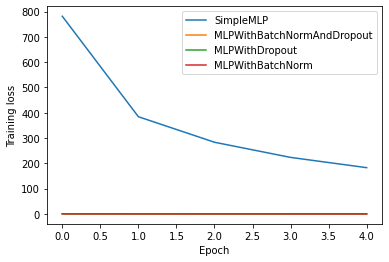

In [42]:
import matplotlib.pyplot as plt

plt.plot(loss_adam_train, label='SimpleMLP')
plt.plot(losses2, label='MLPWithBatchNormAndDropout')
plt.plot(losses3, label='MLPWithDropout')
plt.plot(losses4, label = 'MLPWithBatchNorm')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend()
plt.show()

### Step eight: Mini-batch vs Stocastic
Now that you might have a clear winner in your mind regarding which model and settings perform the best, train it on mini-batch and stocastic and compare time taken, loss curve, accuracy etc.

Perform an analysis like never before!

In [43]:
# code here

model_mini = MLPWithBatchNorm()

# Define the loss function and optimizer
loss_function1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model_mini.parameters(), lr=1e-3)
# lr_scheduler2_1 = optim.lr_scheduler.ExponentialLR(optimizer1, gamma=0.9)


model_stocastic = MLPWithBatchNorm()

# Define the loss function and optimizer
loss_function2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model_stocastic.parameters(), lr=1e-3)
# lr_scheduler2_2 = optim.lr_scheduler.ExponentialLR(optimizer2, gamma=0.9)



In [44]:
losses1 = train_model(model_mini,loss_function1,optimizer1,trainloader_minibatch)
losses2 = train_model(model_stocastic,loss_function2,optimizer2,trainloader_stochastic)



Training of model is started ...



  0%|          | 0/5 [00:00<?, ?it/s]

Starting epoch 1



 20%|██        | 1/5 [00:26<01:47, 26.92s/it]

loss at 0 :0.2554418805355827
Starting epoch 2



 40%|████      | 2/5 [00:54<01:21, 27.33s/it]

loss at 1 :0.13542566021556657
Starting epoch 3



 60%|██████    | 3/5 [01:21<00:54, 27.28s/it]

loss at 2 :0.10337245416864753
Starting epoch 4



 80%|████████  | 4/5 [01:48<00:27, 27.22s/it]

loss at 3 :0.08759124559325476
Starting epoch 5



100%|██████████| 5/5 [02:16<00:00, 27.20s/it]


loss at 4 :0.077470841318431
Training of model is started ...



  0%|          | 0/5 [00:00<?, ?it/s]

Starting epoch 1


ValueError: ignored

In [ ]:
train_acc, train_f1,train_precision,train_recall = get_Accuracy_F1Score_Precision_Recall(trainloader_minibatch,model_mini)
test_acc, test_f1,test_precision,test_recall = get_Accuracy_F1Score_Precision_Recall(testloader_minibatch,model_mini)
print("Results:", 'SimpleMLP_mini')
print("========")
print(f"{'':<10s}{'Accuracy':<10s}{'F1 Score':<10s}{'Precision':<10s}{'Recall':<10s}")
print(f"{'Train':<10s}{train_acc:<10.4f}{train_f1:<10.4f}{train_precision:<10.4f}{train_recall:<10.4f}")
print(f"{'Test':<10s}{test_acc:<10.4f}{test_f1:<10.4f}{test_precision:<10.4f}{test_recall:<10.4f}")


train_acc, train_f1,train_precision,train_recall = get_Accuracy_F1Score_Precision_Recall(trainloader_stochastic,model_stocastic)
test_acc, test_f1,test_precision,test_recall = get_Accuracy_F1Score_Precision_Recall(testloader_stochastic,model_stocastic)
print("Results:", 'SimpleMLP_stoch')
print("========")
print(f"{'':<10s}{'Accuracy':<10s}{'F1 Score':<10s}{'Precision':<10s}{'Recall':<10s}")
print(f"{'Train':<10s}{train_acc:<10.4f}{train_f1:<10.4f}{train_precision:<10.4f}{train_recall:<10.4f}")
print(f"{'Test':<10s}{test_acc:<10.4f}{test_f1:<10.4f}{test_precision:<10.4f}{test_recall:<10.4f}")

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses1, label='SimpleMLP_mini')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend()
plt.show()

import matplotlib.pyplot as plt

plt.plot(losses2, label='SimpleMLP_stoch')

plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend()
plt.show()

### And most importantly!!! What did we learn?
Discuss any and all learnings here. The discussions must be all-encompassing so that we know what did you learn. 

Please do not copy from your friend or copy-paste from the internet. We can see repetitions during evaluations.

In [ ]:
# text here